<a href="https://colab.research.google.com/github/MoFaisal15/MOHAMMEDFAISAL.github.io/blob/main/Mohammed_Faisal_capston_2_Stock_Market_Prediction_LSTM_and_Facebook_ProPhate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stock price Prediction using Real time data
!pip install pandas-datareader

# Data collection library ( panda data reader and Key)

In [ ]:
import pandas_datareader as pdr
key ="3aad410611731dc10853106247df591dac2866ed"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-4-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-17 00:00:00+00:00,217.58,217.95,213.16,213.44,35426997,52.092099,52.180683,51.033881,51.100918,141707988,0.0,1.0
1,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
2,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
3,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
4,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-09 00:00:00+00:00,178.19,180.93,177.010,180.87,60378492,177.949784,180.686091,176.771375,180.626171,60378492,0.00,1.0
1252,AAPL,2023-08-10 00:00:00+00:00,177.97,180.75,177.600,179.48,54686851,177.730081,180.506333,177.360580,179.238045,54686851,0.00,1.0
1253,AAPL,2023-08-11 00:00:00+00:00,177.79,178.62,176.550,177.32,52036672,177.790000,178.620000,176.550000,177.320000,52036672,0.24,1.0
1254,AAPL,2023-08-14 00:00:00+00:00,179.46,179.69,177.305,177.97,43675627,179.460000,179.690000,177.305000,177.970000,43675627,0.00,1.0
1255,AAPL,2023-08-15 00:00:00+00:00,177.45,179.48,177.050,178.88,43622593,177.450000,179.480000,177.050000,178.880000,43622593,0.00,1.0


In [ ]:
# want to predict the closing balance so choosing colosing balance
df1 = df.reset_index()['close']

In [ ]:
df1

0       208.87
1       209.75
2       210.24
3       213.32
4       217.58
         ...  
1252    181.99
1253    178.85
1254    179.80
1255    178.19
1256    177.97
Name: close, Length: 1257, dtype: float64

In [ ]:
df1.shape

(1256,)

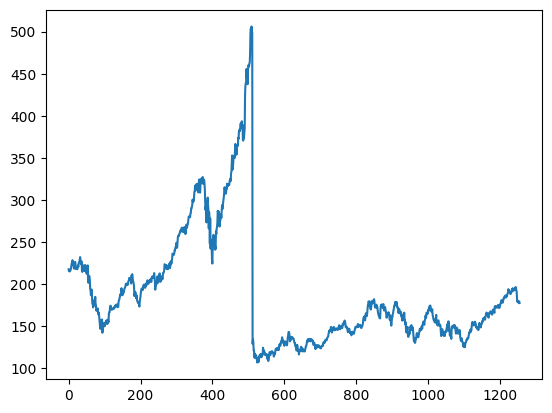

In [ ]:
# Displaying the trandline
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# Feature scaling (minmax aproach = range between 0 and +1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))#converd data in 2D Formate(-1=row and 1=column )


In [ ]:
df1.shape

(1256, 1)

In [ ]:
# split the data into training and test
# training = 65% and test = 35%

training_size = int(len(df1)*0.65)
test_size= len(df1) - training_size


In [ ]:
#time series forcating is a time should be in  sequential
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

In [ ]:
train_data.shape

(816, 1)

In [ ]:
# convert an array of values into a dataset matrix
# here i am doing example: if my dataset have target variable in this pattern 123456789 if my data is 123 than answer is 4
#if my data is 12345 and is 6, if my data is 1234 than my ans is 5 that time will come when my indepentdata is 123456789 and ihave to predict for next value
def create_dataset(dataset, time_step=1):
  datax, datay = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    datax.append(a)
    datay.append(dataset[i + time_step, 0])
  return np.array(datax), np.array(datay)

In [ ]:
# reshape into x = t, t+1, t+2, t+3 and y = t+4
# as you see shape of train data 817,1 so we want 716 data in x_train remaining data and in ytrain
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
print(x_train.shape, y_train.shape)

(715, 100) (715,)


In [ ]:
print(x_test.shape, y_test.shape)

(339, 100) (339,)


# LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
12/12 [==============================] - 23s 120ms/step - loss: 0.0410 - val_loss: 0.0020
Epoch 2/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0160 - val_loss: 0.0054
Epoch 3/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0114 - val_loss: 4.0950e-04
Epoch 4/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0095 - val_loss: 5.4414e-04
Epoch 5/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 4.0021e-04
Epoch 6/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0075 - val_loss: 0.0012
Epoch 7/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0072 - val_loss: 8.3111e-04
Epoch 8/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 2.8427e-04
Epoch 9/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0057 - val_loss: 2.7638e-04
Epoch 10/200
12/12 [==============================] - 0s 18ms/step - loss:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#prediction
train_predict = model.predict(x_train)

23/23 [==============================] - 1s 9ms/step


In [ ]:
train_predict

array([[ 1.05543748e-01],
       [ 1.06690288e-01],
       [ 1.07416019e-01],
       [ 1.08213529e-01],
       [ 1.09521337e-01],
       [ 1.11370116e-01],
       [ 1.13641724e-01],
       [ 1.15211144e-01],
       [ 1.16034679e-01],
       [ 1.16013810e-01],
       [ 1.16502807e-01],
       [ 1.17295161e-01],
       [ 1.17808200e-01],
       [ 1.20267794e-01],
       [ 1.24639317e-01],
       [ 1.29931688e-01],
       [ 1.36233807e-01],
       [ 1.43380463e-01],
       [ 1.50445521e-01],
       [ 1.55814812e-01],
       [ 1.59076929e-01],
       [ 1.60321131e-01],
       [ 1.60497770e-01],
       [ 1.59983128e-01],
       [ 1.59283325e-01],
       [ 1.58527151e-01],
       [ 1.57940254e-01],
       [ 1.57818928e-01],
       [ 1.57834426e-01],
       [ 1.58324450e-01],
       [ 1.59455568e-01],
       [ 1.60966426e-01],
       [ 1.62666559e-01],
       [ 1.63875908e-01],
       [ 1.64958492e-01],
       [ 1.66155666e-01],
       [ 1.67296499e-01],
       [ 1.68013468e-01],
       [ 1.6

In [ ]:
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 9ms/step


In [ ]:
test_predict

array([[0.17244202],
       [0.17008102],
       [0.16696852],
       [0.162622  ],
       [0.15823807],
       [0.15512878],
       [0.15219477],
       [0.149364  ],
       [0.1473909 ],
       [0.1462922 ],
       [0.14569665],
       [0.14433993],
       [0.1425997 ],
       [0.13946572],
       [0.13544697],
       [0.13291599],
       [0.13077727],
       [0.12891114],
       [0.12769742],
       [0.12857223],
       [0.12902838],
       [0.12870273],
       [0.12664765],
       [0.12395523],
       [0.1195782 ],
       [0.11338198],
       [0.10743728],
       [0.10230438],
       [0.0990243 ],
       [0.09576095],
       [0.09161261],
       [0.08704752],
       [0.08379801],
       [0.08159144],
       [0.0802195 ],
       [0.080124  ],
       [0.08220761],
       [0.08570915],
       [0.08967835],
       [0.09393361],
       [0.09680051],
       [0.09822925],
       [0.0991086 ],
       [0.09961314],
       [0.09874571],
       [0.09563247],
       [0.08999191],
       [0.083

In [ ]:
# transformback to original form

train_predict = scaler.inverse_transform(train_predict)
# transformback to original form

test_predict = scaler.inverse_transform(test_predict)

In [ ]:
train_predict

array([[148.97833 ],
       [149.4361  ],
       [149.72585 ],
       [150.04425 ],
       [150.56639 ],
       [151.30452 ],
       [152.21146 ],
       [152.83804 ],
       [153.16685 ],
       [153.15851 ],
       [153.35374 ],
       [153.67009 ],
       [153.87492 ],
       [154.85692 ],
       [156.60225 ],
       [158.71523 ],
       [161.23135 ],
       [164.08466 ],
       [166.90538 ],
       [169.04906 ],
       [170.35147 ],
       [170.8482  ],
       [170.91873 ],
       [170.71327 ],
       [170.43387 ],
       [170.13196 ],
       [169.89764 ],
       [169.8492  ],
       [169.8554  ],
       [170.05104 ],
       [170.50264 ],
       [171.10585 ],
       [171.78462 ],
       [172.26746 ],
       [172.69968 ],
       [173.17766 ],
       [173.63313 ],
       [173.91937 ],
       [173.8397  ],
       [173.52892 ],
       [173.71164 ],
       [174.5519  ],
       [175.8623  ],
       [177.52155 ],
       [179.47006 ],
       [181.6071  ],
       [183.4872  ],
       [185.0

In [ ]:
test_predict

array([[175.68748 ],
       [174.74484 ],
       [173.50218 ],
       [171.76683 ],
       [170.01654 ],
       [168.77516 ],
       [167.60376 ],
       [166.47357 ],
       [165.68582 ],
       [165.24716 ],
       [165.00938 ],
       [164.46771 ],
       [163.77293 ],
       [162.5217  ],
       [160.9172  ],
       [159.90671 ],
       [159.05283 ],
       [158.30777 ],
       [157.8232  ],
       [158.17247 ],
       [158.35458 ],
       [158.22456 ],
       [157.40408 ],
       [156.32912 ],
       [154.58159 ],
       [152.10776 ],
       [149.73434 ],
       [147.68503 ],
       [146.37546 ],
       [145.07256 ],
       [143.41634 ],
       [141.59372 ],
       [140.29636 ],
       [139.41537 ],
       [138.86765 ],
       [138.8295  ],
       [139.66138 ],
       [141.05939 ],
       [142.64409 ],
       [144.343   ],
       [145.48761 ],
       [146.05803 ],
       [146.40912 ],
       [146.61055 ],
       [146.26422 ],
       [145.02126 ],
       [142.76927 ],
       [140.0

In [ ]:
# calculating RMSC  performace matrics for traing data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.43272518727017

In [ ]:
### RMSC for Test data
math.sqrt(mean_squared_error(y_test,test_predict))

156.87485646984547

# important library for FP and Loading data
here is real time data fetching from pandas library name pandas datareader tiingo


In [ ]:
!python -m pip install prophet

In [ ]:
import prophet
from prophet import Prophet #Importing prophet (prediction and forecasting library.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-17 00:00:00+00:00,217.58,217.95,213.16,213.44,35426997,52.092099,52.180683,51.033881,51.100918,141707988,0.0,1.0
1,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
2,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
3,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
4,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0


Selecting the specific data
Since we’ll be predicting the “Close” value, we shall only take “Date” and “Close” column.

In [ ]:
df2 = df[['date','close']]

In [ ]:
df2.head()

,date,close
0,2018-08-17 00:00:00+00:00,217.58
1,2018-08-20 00:00:00+00:00,215.46
2,2018-08-21 00:00:00+00:00,215.04
3,2018-08-22 00:00:00+00:00,215.05
4,2018-08-23 00:00:00+00:00,215.49


In [ ]:
from datetime import date
df2['date'] = pd.to_datetime(df2['date'])
df2['ds'] = df2['date'].dt.date
df2['time'] = df2['date'].dt.time

<ipython-input-41-741617ed23a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'])
<ipython-input-41-741617ed23a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ds'] = df2['date'].dt.date
<ipython-input-41-741617ed23a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
df2.head()

,date,close,ds,time
0,2018-08-17 00:00:00+00:00,217.58,2018-08-17,00:00:00
1,2018-08-20 00:00:00+00:00,215.46,2018-08-20,00:00:00
2,2018-08-21 00:00:00+00:00,215.04,2018-08-21,00:00:00
3,2018-08-22 00:00:00+00:00,215.05,2018-08-22,00:00:00
4,2018-08-23 00:00:00+00:00,215.49,2018-08-23,00:00:00


In [ ]:
df3 = df2[['ds','close']]

In [ ]:
df3.head()

,ds,close
0,2018-08-17,217.58
1,2018-08-20,215.46
2,2018-08-21,215.04
3,2018-08-22,215.05
4,2018-08-23,215.49


In [ ]:
df3 = df2.rename(columns = {'close':'y'})

In [ ]:
df3.head()

,date,y,ds,time
0,2018-08-17 00:00:00+00:00,217.58,2018-08-17,00:00:00
1,2018-08-20 00:00:00+00:00,215.46,2018-08-20,00:00:00
2,2018-08-21 00:00:00+00:00,215.04,2018-08-21,00:00:00
3,2018-08-22 00:00:00+00:00,215.05,2018-08-22,00:00:00
4,2018-08-23 00:00:00+00:00,215.49,2018-08-23,00:00:00


In [ ]:
df4 = df3[['ds','y']]

In [ ]:
df4.head()

,ds,y
0,2018-08-17,217.58
1,2018-08-20,215.46
2,2018-08-21,215.04
3,2018-08-22,215.05
4,2018-08-23,215.49


# Model bulding
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

In [ ]:
# The Prophet class (model)
fbp = Prophet(daily_seasonality = True)
 # Fit the model
fbp.fit(df4)
# We need to specify the number of days in future
fut = fbp.make_future_dataframe(periods=365)
forecast = fbp.predict(fut)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjbthpjn0/g9pr4y19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjbthpjn0/cusjzndu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18984', 'data', 'file=/tmp/tmpjbthpjn0/g9pr4y19.json', 'init=/tmp/tmpjbthpjn0/cusjzndu.json', 'output', 'file=/tmp/tmpjbthpjn0/prophet_modelqtakvhgw/prophet_model-20230816142512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Prediction Time
Now, for the last step, we will ask the model to predict future values and then visualize the predictions.

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
# A better plot than the simple matplotlib
plot_plotly(fbp, forecast)